In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from Utilities.basic_units import radians
from src import orbits as orb
from Utilities import sections as sec

from Utilities.operators import make_tree, to_cylindric, Ryan_sampler
from Utilities.time_extractor import days_since_distruption
matplotlib.rcParams['figure.dpi'] = 150

<Figure size 800x600 with 0 Axes>

In [2]:
G = 1
m = 4
Mbh = 10**m
beta = 1
mstar = .5
Rstar = .47
n = 1.5
check = 'Low' # '' or 'HiRes' or 'Res20'
check1 = 'HiRes' 
check2 = 'Res20'
folder = f'R{Rstar}M{mstar}BH{Mbh}beta{beta}S60n{n}'
snap = '164'
snap2 = '169'
snapL = '164'
path = f'TDE/{folder}{check}/{snap}'
path1 = f'TDE/{folder}{check1}/{snap}'
path2 = f'TDE/{folder}{check2}/{snap2}'
#saving_path = f'Figs/{folder}/{check}'
#print(f'We are in: {path}, \nWe save in: {saving_path}')
threshold=1/3

Rt = Rstar * (Mbh/mstar)**(1/3)
Rp =  Rt / beta
R0 = 0.6 * Rp
apo = Rt**2 / Rstar #2 * Rt * (Mbh/mstar)**(1/3)

G_SI = 6.6743e-11
Msol = 2e30 #1.98847e30 # kg
Rsol = 7e8 #6.957e8 # m
t = np.sqrt(Rsol**3 / (Msol*G_SI ))
c = 3e8 / (7e8/t)

Rs = 2*G*Mbh / c**2

# cfr tidal disruption and at smoothing lenght
xcfr, ycfr, cfr = orb.make_cfr(Rt)
xcfr0, ycfr0, cfr0 = orb.make_cfr(R0)

theta_lim = np.pi#3*np.pi/4
step = 0.02
theta_init = np.arange(-theta_lim, theta_lim, step)
theta_arr = Ryan_sampler(theta_init)

Load data

In [3]:
data = make_tree(path, snap, energy = False)
THETA, RADIUS_cyl = to_cylindric(data.X, data.Y)
dim_cell = data.Vol**(1/3) 

tfb = days_since_distruption(f'{path1}/snap_{snap}.h5', m, mstar, Rstar, choose = 'tfb')

# div = np.load(f'{folder}/{snap}/DivV_{snap}.npy')
# shockzone = np.loadtxt(f'data/{snap}/shockzone_{snap}.txt')
# shocksurface = np.loadtxt(f'data/{snap}/shocksurface_{snap}.txt')

# Shock zone
# idx_zone = shockzone[0]
# idx_zone = np.array([int(i) for i in idx_zone])
# x_zone = X[idx_zone]
# y_zone = Y[idx_zone]
# z_zone = Z[idx_zone]
# Vx_zone = VX[idx_zone]
# Vy_zone = VY[idx_zone]
# Vz_zone = VZ[idx_zone]
# Diss_zone = Diss[idx_zone]
# dim_cell_zone = dim_cell[idx_zone]
# div_zone = div[idx_zone]

# Shock surface
# idx_surf = shocksurface[0]
# idx_surf = np.array([int(i) for i in idx_surf])
# x_surf = x_zone[idx_surf]
# y_surf = y_zone[idx_surf]
# z_surf = z_zone[idx_surf]
# Vx_surf = Vx_zone[idx_surf]
# Vy_surf = Vy_zone[idx_surf]
# dim_cell_surf = dim_cell_zone[idx_surf]
# div_surf = div_zone[idx_surf]

density = np.load(f'TDE/{folder}{check}/{snap}/smoothed_Den_{snap}.npy') 
midplane = np.abs(data.Z) < dim_cell
X_midplane, Y_midplane, Z_midplane, dim_midplane, Mass_midplane, Den_midplane, = \
    sec.make_slices([data.X, data.Y, data.Z, dim_cell, data.Mass, density], midplane)

days after disruption: 1.344488293275381 // t_fall: 2.5777261297507925 // sim_time: 72.92898108781884


In [4]:
# idx = 120
# theta_chosen = theta_arr[idx]
# streamLow = np.load(f'data/{folder}/stream_{check}{snap}_{step}.npy')
# theta_arr, indeces_orbit = streamLow[0], streamLow[1].astype(int)
# x_orbit, y_orbit, z_orbit, dim_orbit = data.X[indeces_orbit], data.Y[indeces_orbit], data.Z[indeces_orbit], dim_cell[indeces_orbit]
# x_chosen, y_chosen, z_chosen = x_orbit[idx], y_orbit[idx], z_orbit[idx]
# streamL = np.load(f'data/{folder}/stream_Low{snapL}_{step}.npy')
# indeces_orbitL = streamL[1].astype(int)
# DenL = np.load(f'TDE/{folder}Low/{snapL}/smoothed_Den_{snapL}.npy')
# stream_thresh = DenL[indeces_orbitL]/3

# condition_tra, x_onplane, x0 = sec.transverse_plane(data.X, data.Y, dim_cell, x_orbit, y_orbit, idx, coord= True)
# X_tra, Y_tra, Z_tra, Den_tra, RADIUS_cyl_tra = \
#     sec.make_slices([data.X, data.Y, data.Z, density, RADIUS_cyl], condition_tra)
# X_tra_midplane = X_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
# Y_tra_midplane = Y_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
# x_onplane_midplane = x_onplane[np.abs(Z_tra) < dim_cell[condition_tra]]
# indeces_boundary, x_T_width, w_params, h_params = orb.find_single_boundaries(data.X, data.Y, data.Z, dim_cell, density, indeces_orbit, idx, stream_thresh[idx])

# plt.figure(figsize=(6,4))
# img = plt.scatter(X_midplane, Y_midplane, c = Den_midplane, s = .1, cmap = 'viridis', vmin = 0, vmax = 2e-8)
# plt.scatter(X_tra_midplane, Y_tra_midplane, s = 0.1, c = 'k')
# cbar = plt.colorbar(img)
# cbar.set_label(r' Density', fontsize = 16)
# plt.xlim(-20,20)
# plt.ylim(-20,20)
# plt.ylabel(r'Y [$R_\odot$]', fontsize = 18)
# plt.title(f'theta: {theta_chosen:.2f}', fontsize = 18)

In [5]:
data1 = make_tree(path1, snap, energy = False)
data2 = make_tree(path2, snap2, energy = False)

THETA1, RADIUS_cyl1 = to_cylindric(data1.X, data1.Y)
THETA2, RADIUS_cyl2 = to_cylindric(data2.X, data2.Y)

dim_cell1 = data1.Vol**(1/3) 
dim_cell2 = data2.Vol**(1/3) 

In [6]:
density1 = np.load(f'TDE/{folder}{check1}/{snap}/smoothed_Den_{snap}.npy') 
density2 = np.load(f'TDE/{folder}{check2}/{snap2}/smoothed_Den_{snap2}.npy') 

Midplane 

In [7]:
midplane1 = np.abs(data1.Z) < dim_cell1
X_midplane1, Y_midplane1, Z_midplane1, dim_midplane1, Mass_midplane1, Den_midplane1 = \
    sec.make_slices([data1.X, data1.Y, data1.Z, dim_cell1, data1.Mass, density1], midplane1)

midplane2 = np.abs(data2.Z) < dim_cell2
X_midplane2, Y_midplane2, Z_midplane2, dim_midplane2, Mass_midplane2, Den_midplane2 = \
    sec.make_slices([data2.X, data2.Y, data2.Z, dim_cell2, data2.Mass, density2], midplane2)

Tangent and transverse plane

In [8]:
# check if the file with the data exist and load it
try:
    streamLow = np.load(f'data/{folder}/stream_{check}{snap}_{step}.npy')
    theta_arr, indeces_orbit = streamLow[0], streamLow[1].astype(int)
    streamMiddle = np.load(f'data/{folder}/stream_{check1}{snap}_{step}.npy')
    print('Loading data')
    indeces_orbit1 = streamMiddle[1].astype(int)
    streamRes20 = np.load(f'data/{folder}/stream_{check2}{snap2}_{step}.npy')
    indeces_orbit2 = streamRes20[1].astype(int)
# otherwise compute it
except:
    print('Computing data')
    indeces_orbit = orb.find_transverse_maximum(data.X, data.Y, data.Z, dim_cell, density, theta_arr, Rt)
    np.save(f'data/{folder}/stream_{check}{snap}_{step}', [theta_arr, indeces_orbit])
    print('Low done')
    indeces_orbit1 = orb.find_transverse_maximum(data1.X, data1.Y, data1.Z, dim_cell1, density1, theta_arr, Rt)
    np.save(f'data/{folder}/stream_{check1}{snap}_{step}', [theta_arr, indeces_orbit1])
    print('HiRes done')
    indeces_orbit2 = orb.find_transverse_maximum(data2.X, data2.Y, data2.Z, dim_cell2, density2, theta_arr, Rt)
    np.save(f'data/{folder}/stream_{check2}{snap2}_{step}', [theta_arr, indeces_orbit2])

Loading data


In [9]:
x_orbit, y_orbit, z_orbit, dim_orbit = data.X[indeces_orbit], data.Y[indeces_orbit], data.Z[indeces_orbit], dim_cell[indeces_orbit]
x_orbit1, y_orbit1, z_orbit1, dim_orbit1 = data1.X[indeces_orbit1], data1.Y[indeces_orbit1], data1.Z[indeces_orbit1], dim_cell1[indeces_orbit1]
x_orbit2, y_orbit2, z_orbit2, dim_orbit2 = data2.X[indeces_orbit2], data2.Y[indeces_orbit2], data2.Z[indeces_orbit2], dim_cell2[indeces_orbit2]

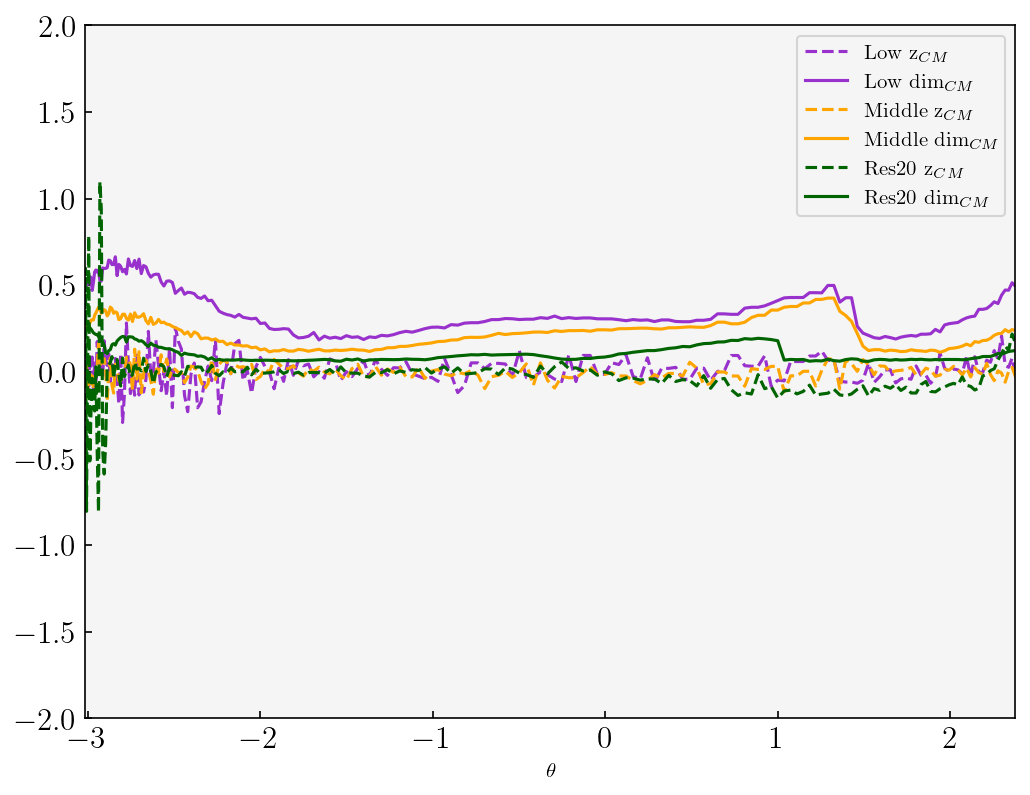

In [10]:
plt.plot(theta_arr, z_orbit, '--', c = 'darkorchid', label = r'Low z$_{CM}$')
plt.plot(theta_arr, dim_orbit, c = 'darkorchid', label = r'Low dim$_{CM}$')
plt.plot(theta_arr, z_orbit1, '--', c = 'orange', label = r'Middle z$_{CM}$')
plt.plot(theta_arr, dim_orbit1, c = 'orange', label = r'Middle dim$_{CM}$')
plt.plot(theta_arr, z_orbit2, '--', c = 'darkgreen', label = r'Res20 z$_{CM}$')
plt.plot(theta_arr, dim_orbit2, c = 'darkgreen', label = r'Res20 dim$_{CM}$')
plt.legend()
plt.xlim(theta_arr[30],theta_arr[230])
plt.ylim(-2, 2)
plt.xlabel(r'$\theta$')
plt.savefig(f'Figs/{folder}/Z&dim_{np.round(tfb,1)}.png')

(-80.0, 80.0)

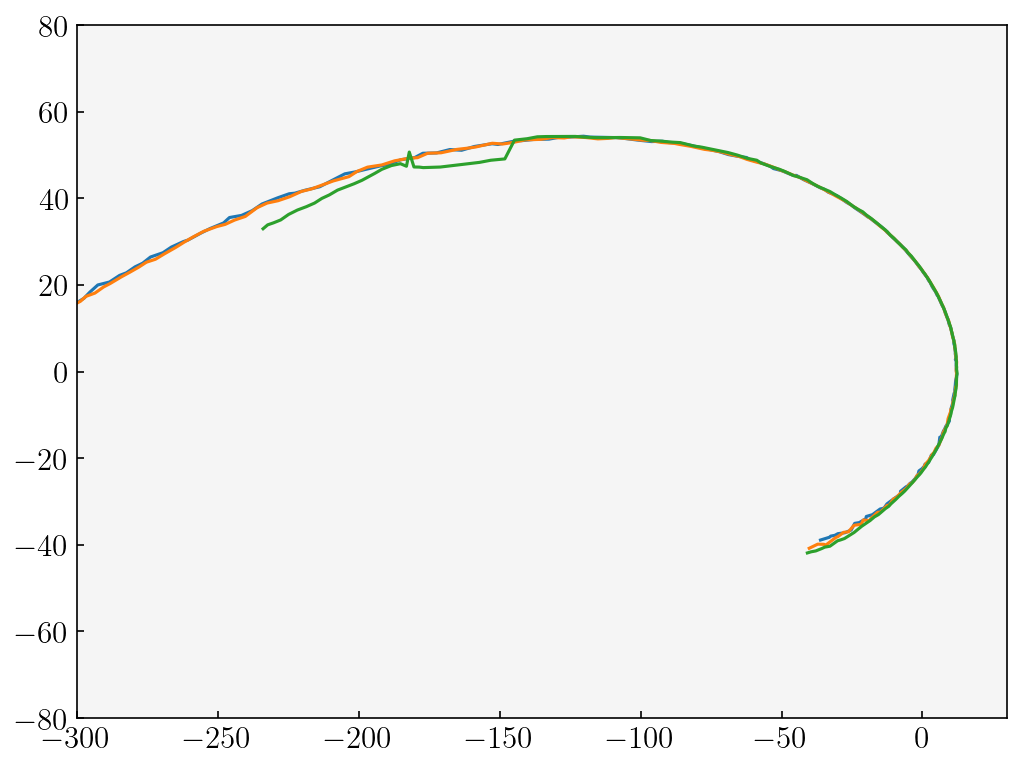

In [11]:
plt.plot(x_orbit[:230], y_orbit[:230], label = 'Low')
plt.plot(x_orbit1[:230], y_orbit1[:230], label = 'HiRes')
plt.plot(x_orbit2[30:230], y_orbit2[30:230], label = 'Res20')
plt.xlim(-300,30)
plt.ylim(-80,80)

In [12]:
streamL = np.load(f'data/{folder}/stream_Low{snapL}_{step}.npy')
indeces_orbitL = streamL[1].astype(int)
DenL = np.load(f'TDE/{folder}Low/{snapL}/smoothed_Den_{snapL}.npy')
stream_thresh = DenL[indeces_orbitL]/3

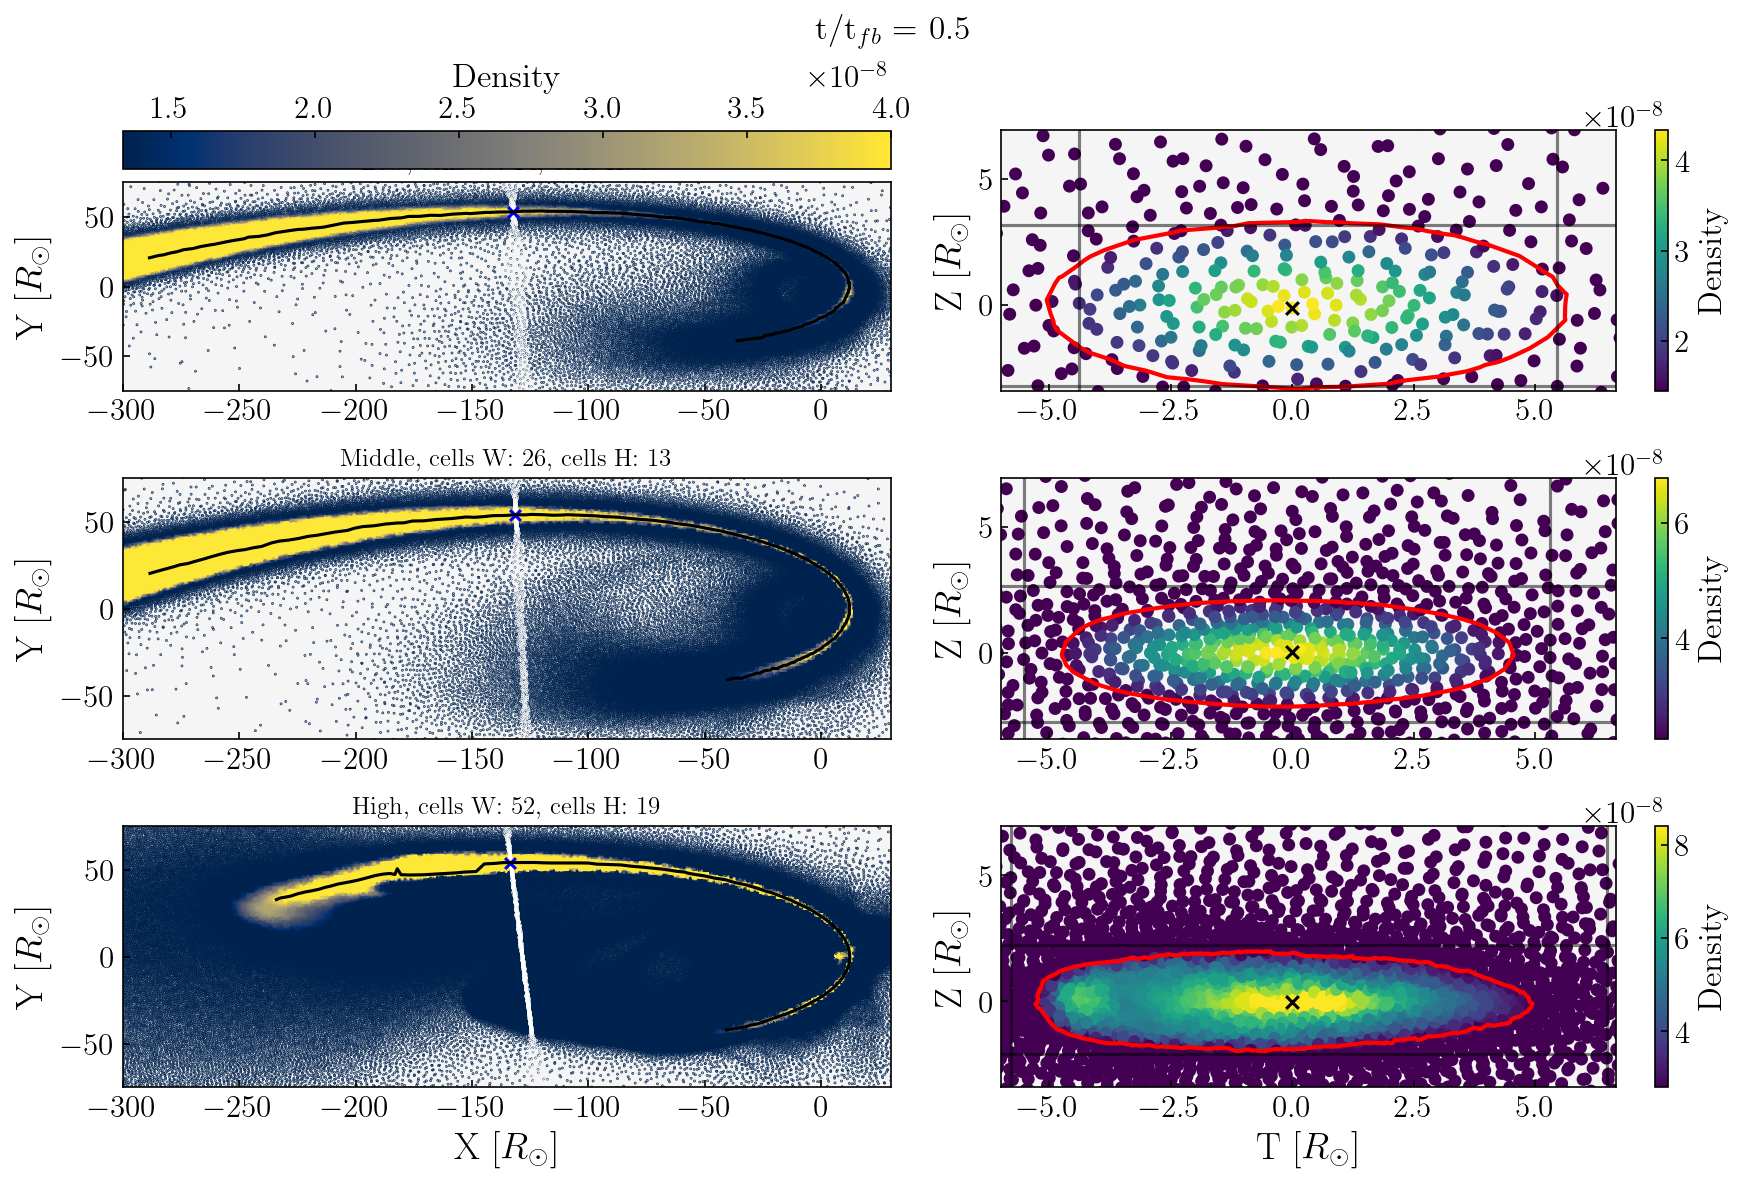

In [14]:
idx = 60#np.argmin(np.abs(theta_arr+7*np.pi/8))
theta_chosen = theta_arr[idx]
x_chosen, y_chosen, z_chosen = x_orbit[idx], y_orbit[idx], z_orbit[idx]
x_chosen1, y_chosen1, z_chosen1 = x_orbit1[idx], y_orbit1[idx], z_orbit1[idx]
x_chosen2, y_chosen2, z_chosen2 = x_orbit2[idx], y_orbit2[idx], z_orbit2[idx]

condition_tra, x_onplane, x0 = sec.transverse_plane(data.X, data.Y, dim_cell, x_orbit, y_orbit, idx, coord= True)
X_tra, Y_tra, Z_tra, Den_tra, RADIUS_cyl_tra = \
    sec.make_slices([data.X, data.Y, data.Z, density, RADIUS_cyl], condition_tra)
X_tra_midplane = X_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
Y_tra_midplane = Y_tra[np.abs(Z_tra) < dim_cell[condition_tra]]
x_onplane_midplane = x_onplane[np.abs(Z_tra) < dim_cell[condition_tra]]
indeces_boundary, x_T_width, w_params, h_params = orb.find_single_boundaries(data.X, data.Y, data.Z, dim_cell, density, indeces_orbit, idx, stream_thresh[idx])

# do the same for data1
condition_tra1, x_onplane1, x01 = sec.transverse_plane(data1.X, data1.Y, dim_cell1, x_orbit1, y_orbit1, idx, coord= True)
X_tra1, Y_tra1, Z_tra1, Den_tra1, RADIUS_cyl_tra1 = \
    sec.make_slices([data1.X, data1.Y, data1.Z, density1, RADIUS_cyl1], condition_tra1)
X_tra_midplane1 = X_tra1[np.abs(Z_tra1) < dim_cell1[condition_tra1]]
Y_tra_midplane1 = Y_tra1[np.abs(Z_tra1) < dim_cell1[condition_tra1]]
x_onplane_midplane1 = x_onplane1[np.abs(Z_tra1) < dim_cell1[condition_tra1]]
indeces_boundary1, x_T_width1, w_params1, h_params1 = orb.find_single_boundaries(data1.X, data1.Y, data1.Z, dim_cell1, density1, indeces_orbit1, idx, stream_thresh[idx])

# do the same for data2
condition_tra2, x_onplane2, x02 = sec.transverse_plane(data2.X, data2.Y, dim_cell2 ,x_orbit2, y_orbit2, idx, coord= True)
X_tra2, Y_tra2, Z_tra2, Den_tra2, RADIUS_cyl_tra2 = \
    sec.make_slices([data2.X, data2.Y, data2.Z, data2.Den, RADIUS_cyl2], condition_tra2)
X_tra_midplane2 = X_tra2[np.abs(Z_tra2) < dim_cell2[condition_tra2]]
Y_tra_midplane2 = Y_tra2[np.abs(Z_tra2) < dim_cell2[condition_tra2]]
x_onplane_midplane2 = x_onplane2[np.abs(Z_tra2) < dim_cell2[condition_tra2]]
indeces_boundary2, x_T_width2, w_params2, h_params2 = orb.find_single_boundaries(data2.X, data2.Y, data2.Z, dim_cell2, data2.Den, indeces_orbit2, idx, stream_thresh[idx])

# Things for pretty plots
vmaxrho_xy = 4e-8
vminrho_xy = 1/3 * vmaxrho_xy 
vmaxrho = density[indeces_orbit[idx]]
vmaxrho1 = density1[indeces_orbit1[idx]]
vmaxrho2 = density2[indeces_orbit2[idx]]
vminrho = 1/3 * vmaxrho 
vminrho1 = 1/3 * vmaxrho1
vminrho2 = 1/3 * vmaxrho2   
indeces_low, indeces_low1, indeces_low2 = indeces_boundary[0], indeces_boundary1[0], indeces_boundary2[0]
indeces_up, indeces_up1, indeces_up2 = indeces_boundary[1], indeces_boundary1[1], indeces_boundary2[1]
indeces_low_h, indeces_low_h1, indeces_low_h2 = indeces_boundary[2], indeces_boundary1[2], indeces_boundary2[2]
indeces_up_h, indeces_up_h1, indeces_up_h2 = indeces_boundary[3], indeces_boundary1[3], indeces_boundary2[3]
xlim_neg = np.min([x_T_width[0], x_T_width1[0], x_T_width2[0]]) - 0.2
xlim = np.max([x_T_width[1], x_T_width1[1], x_T_width2[1]]) + 0.2
ylim_neg = np.min([data.Z[indeces_low_h], data1.Z[indeces_low_h1], data2.Z[indeces_low_h2]]) - 0.2    
ylim = np.max([data.Z[indeces_up_h], data1.Z[indeces_up_h1], data2.Z[indeces_up_h1]]) + 0.2
# Plotting
fig, ax = plt.subplots(3,2, figsize = (12,8))
img = ax[0][0].scatter(X_midplane, Y_midplane, c = Den_midplane, s = .1, cmap = 'cividis', vmin = vminrho_xy, vmax = vmaxrho_xy)
cbar = plt.colorbar(img, location = 'top')
cbar.set_label(r' Density', fontsize = 16)
ax[0][0].plot(x_orbit[20:230], y_orbit[20:230], c = 'k')
ax[0][0].scatter(X_tra_midplane, Y_tra_midplane, s = 0.1, c = 'white')
ax[0][0].scatter(x_chosen, y_chosen, marker = 'x', s = 27, c = 'b')
ax[0][0].set_xlim(-300,30)
ax[0][0].set_ylim(-75,75)
ax[0][0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)

img1 = ax[0][1].scatter(x_onplane, Z_tra, c = Den_tra,  cmap = 'viridis', s = 27, vmin = vminrho, vmax = vmaxrho)
cbar1 = plt.colorbar(img1)
cbar1.set_label(r' Density', fontsize = 16)
contour = ax[0][1].tricontour(x_onplane, Z_tra, Den_tra, levels=[vmaxrho/3], linewidths=2, colors='red')
ax[0][1].clabel(contour, inline=True, fontsize=8, fmt = '%.1e')
ax[0][1].scatter(0, z_orbit[idx], marker = 'x', s = 37, c = 'k', alpha = 1)
ax[0][1].axvline(x_T_width[0], c = 'k', alpha = 0.5)
ax[0][1].axvline(x_T_width[1], c = 'k', alpha = 0.5) # T coordinates for width
ax[0][1].axhline(data.Z[indeces_low_h], c = 'k', alpha = 0.5)
ax[0][1].axhline(data.Z[indeces_up_h], c = 'k', alpha = 0.5)
ax[0][1].set_xlim(xlim_neg, xlim)
ax[0][1].set_ylim(ylim_neg, ylim)
ax[0][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
ax[0][0].set_title(f'{check}, cells W: {int(w_params[1])}, cells H: {int(h_params[1])}', fontsize = 12)

## HiRes
img = ax[1][0].scatter(X_midplane1, Y_midplane1, c = Den_midplane1, s = .1, cmap = 'cividis', vmin = vminrho_xy, vmax = vmaxrho_xy)
ax[1][0].plot(x_orbit1[20:230], y_orbit1[20:230], c = 'k')
# ax[1][0].contour(xcfr, ycfr, cfr, [0], linestyles = 'dotted', colors = 'k')
ax[1][0].scatter(X_tra_midplane1, Y_tra_midplane1, s = 0.1, c = 'white')
ax[1][0].scatter(x_chosen1, y_chosen1, marker = 'x', s = 27, c = 'b')
ax[1][0].set_xlim(-300,30)
ax[1][0].set_ylim(-75,75)
ax[1][0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)

img1 = ax[1][1].scatter(x_onplane1, Z_tra1, c = Den_tra1,  cmap = 'viridis', s = 27, vmin = vminrho1, vmax = vmaxrho1)
cbar1 = plt.colorbar(img1)
cbar1.set_label(r' Density', fontsize = 16)
contour = ax[1][1].tricontour(x_onplane1, Z_tra1, Den_tra1, levels=[vmaxrho1/3], linewidths=2, colors='red')
ax[1][1].clabel(contour, inline=True, fontsize=18, fmt = '%.1e', colors = 'r')
ax[1][1].scatter(0, z_orbit1[idx], marker = 'x', s = 37, c = 'k', alpha = 1)
ax[1][1].axvline(x_T_width1[0], c = 'k', alpha = 0.5)
ax[1][1].axvline(x_T_width1[1], c = 'k', alpha = 0.5) # T coordinates for width
ax[1][1].axhline(data1.Z[indeces_low_h1], c = 'k', alpha = 0.5)
ax[1][1].axhline(data1.Z[indeces_up_h1], c = 'k', alpha = 0.5)
ax[1][1].set_xlim(xlim_neg, xlim)
ax[1][1].set_ylim(ylim_neg, ylim)
ax[1][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
ax[1][0].set_title(f'Middle, cells W: {int(w_params1[1])}, cells H: {int(h_params1[1])}', fontsize = 12)

## Res20
img = ax[2][0].scatter(X_midplane2, Y_midplane2, c = Den_midplane2, s = .1, cmap = 'cividis', vmin = vminrho_xy, vmax = vmaxrho_xy)
ax[2][0].plot(x_orbit2[30:230], y_orbit2[30:230], c = 'k')
# ax[2][0].contour(xcfr, ycfr, cfr, [0], linestyles = 'dotted', colors = 'k')
ax[2][0].scatter(X_tra_midplane2, Y_tra_midplane2, s = 0.1, c = 'white')
ax[2][0].scatter(x_chosen2, y_chosen2, marker = 'x', s = 27, c = 'b')
ax[2][0].set_xlim(-300,30)
ax[2][0].set_ylim(-75,75)
ax[2][0].set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax[2][0].set_ylabel(r'Y [$R_\odot$]', fontsize = 18)

img1 = ax[2][1].scatter(x_onplane2, Z_tra2, c = Den_tra2,  cmap = 'viridis', s = 27, vmin = vminrho2, vmax = vmaxrho2)
cbar1 = plt.colorbar(img1)
cbar1.set_label(r' Density', fontsize = 16)
contour = ax[2][1].tricontour(x_onplane2, Z_tra2, Den_tra2, levels=[vmaxrho2/3], linewidths=2, colors='red')
ax[2][1].clabel(contour, inline=True, fontsize=8, fmt = '%.1e')
ax[2][1].scatter(0, z_orbit2[idx], marker = 'x', s = 37, c = 'k', alpha = 1)
ax[2][1].axvline(x_T_width2[0], c = 'k', alpha = 0.5)
ax[2][1].axvline(x_T_width2[1], c = 'k', alpha = 0.5) # T coordinates for width
ax[2][1].axhline(data2.Z[indeces_low_h2], c = 'k', alpha = 0.5)
ax[2][1].axhline(data2.Z[indeces_up_h2], c = 'k', alpha = 0.5)
ax[2][1].set_xlim(xlim_neg, xlim) # T coordinates for width
ax[2][1].set_ylim(ylim_neg, ylim)
ax[2][1].set_xlabel(r'T [$R_\odot]$', fontsize = 18)
ax[2][1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
ax[2][0].set_title(f'High, cells W: {int(w_params2[1])}, cells H: {int(h_params2[1])}', fontsize = 12)

plt.suptitle(r't/t$_{fb}$ = ' + str(np.round(tfb,1)), fontsize = 16)
plt.tight_layout()

plt.savefig(f'Figs/{folder}/multiple/wH{idx}.png')